<a href="https://colab.research.google.com/github/david2588e/DeepBSDE/blob/master/study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
data = pd.read_csv('../content/3suan.csv',header = 0, usecols=[0,1,2,3])
data.head()

,STSA,*Oil Absorption Number,"Tint Strength, IRB=100%",Sieve residue (325M %)
0,36.1,84.3,64.7,0.0038
1,36.5,91.0,64.1,0.0015
2,32.0,88.0,62.0,0.0014
3,33.8,89.5,58.1,0.0009
4,37.2,90.6,65.8,0.0014


In [ ]:
!pip install investpy
import investpy 
import pandas as pd
import matplotlib.pyplot as plt

symbols=['China 10Y','China 20Y', 'China 15Y','China 7Y','China 30Y','China 3Y','China 2Y','China 1Y','China 5Y']
data_list = []
for code in symbols:
    print(code)
    df = investpy.get_bond_recent_data(bond=code)[ 'Close']
    #df.sort_values(df.index, inplace=True)
    df.rename(code, inplace=True)
    #df.set_index('Date', inplace=True)
    data_list.append(df)
df = pd.concat(data_list, axis=1)
df.head()
df.index = pd.to_datetime(df.index, format = "%Y-%m-%d")
df.info()
df.index[1]

China 10Y
China 20Y
China 15Y
China 7Y
China 30Y
China 3Y
China 2Y
China 1Y
China 5Y
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 25 entries, 2021-11-02 to 2021-12-02
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   China 10Y  25 non-null     float64
 1   China 20Y  23 non-null     float64
 2   China 15Y  23 non-null     float64
 3   China 7Y   23 non-null     float64
 4   China 30Y  23 non-null     float64
 5   China 3Y   23 non-null     float64
 6   China 2Y   23 non-null     float64
 7   China 1Y   25 non-null     float64
 8   China 5Y   23 non-null     float64
dtypes: float64(9)
memory usage: 2.0 KB


Timestamp('2021-11-03 00:00:00')

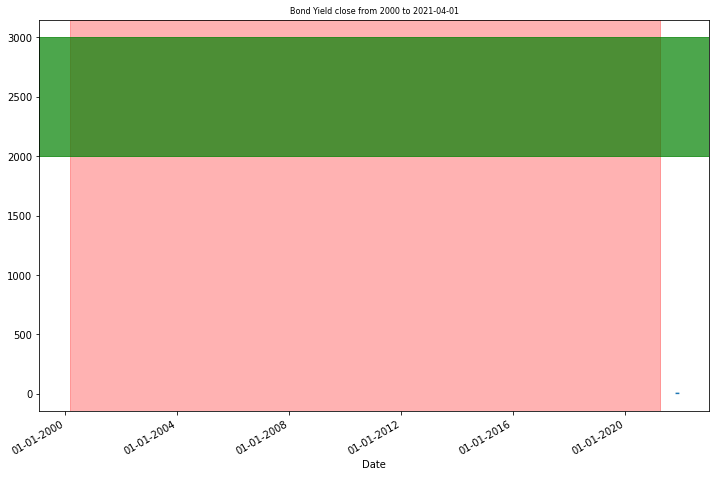

Date
2021-11-02   2021-11-02
2021-11-03   2021-11-03
2021-11-04   2021-11-04
2021-11-05   2021-11-05
2021-11-08   2021-11-08
2021-11-09   2021-11-09
2021-11-10   2021-11-10
2021-11-11   2021-11-11
2021-11-12   2021-11-12
2021-11-13   2021-11-13
2021-11-15   2021-11-15
2021-11-16   2021-11-16
2021-11-17   2021-11-17
2021-11-18   2021-11-18
2021-11-19   2021-11-19
2021-11-22   2021-11-22
2021-11-23   2021-11-23
2021-11-24   2021-11-24
2021-11-25   2021-11-25
2021-11-26   2021-11-26
2021-11-27   2021-11-27
2021-11-29   2021-11-29
2021-11-30   2021-11-30
2021-12-01   2021-12-01
2021-12-02   2021-12-02
Name: Date, dtype: datetime64[ns]

In [ ]:
ax = df['China 10Y'].dropna().plot(fontsize=10,figsize=(12,8))
#df['Date'] = pd.to_datetime(df.index, format = "%d-%m-%Y")
from matplotlib import dates as mpl_dates
xfmt = mpl_dates.DateFormatter('%d-%m-%Y')
ax.xaxis.set_major_formatter(xfmt)
ax.axvspan('2000-03-01', '2021-04-01', color='red', alpha=0.3)
ax.set_title('Bond Yield close from 2000 to 2021-04-01', fontsize=8)
ax.axhspan(2000, 3000, color='green', alpha=0.7)
plt.show()
df['Date'] 

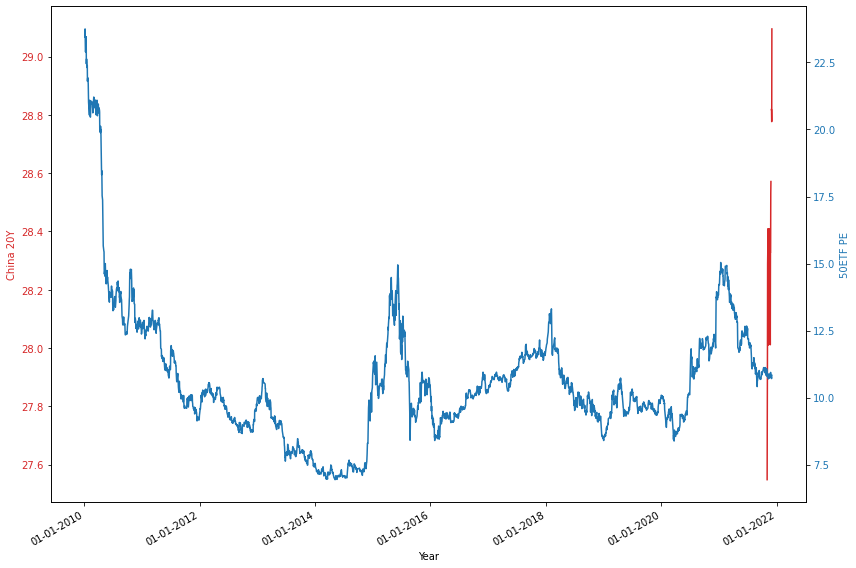

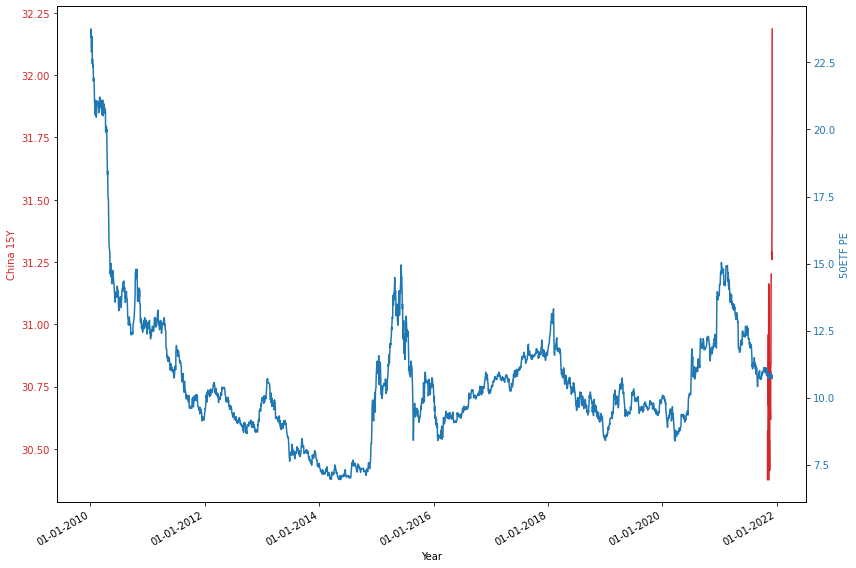

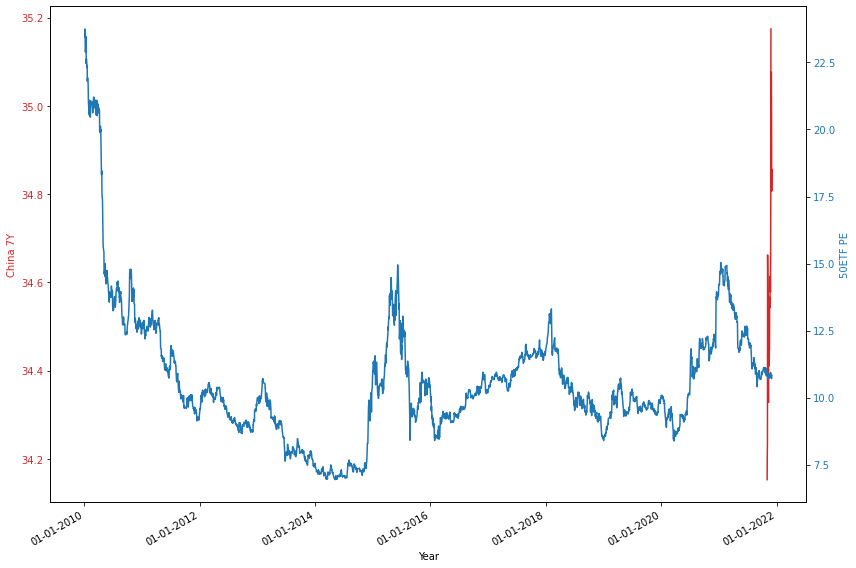

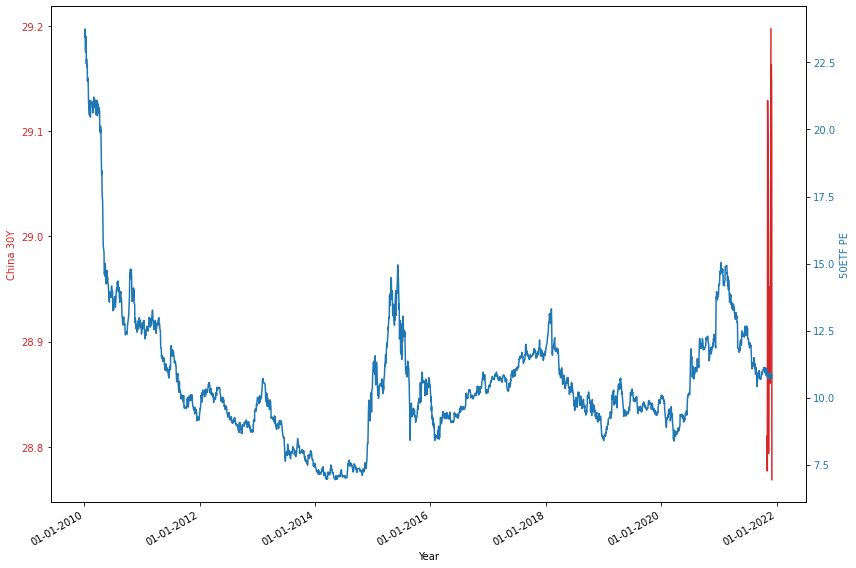

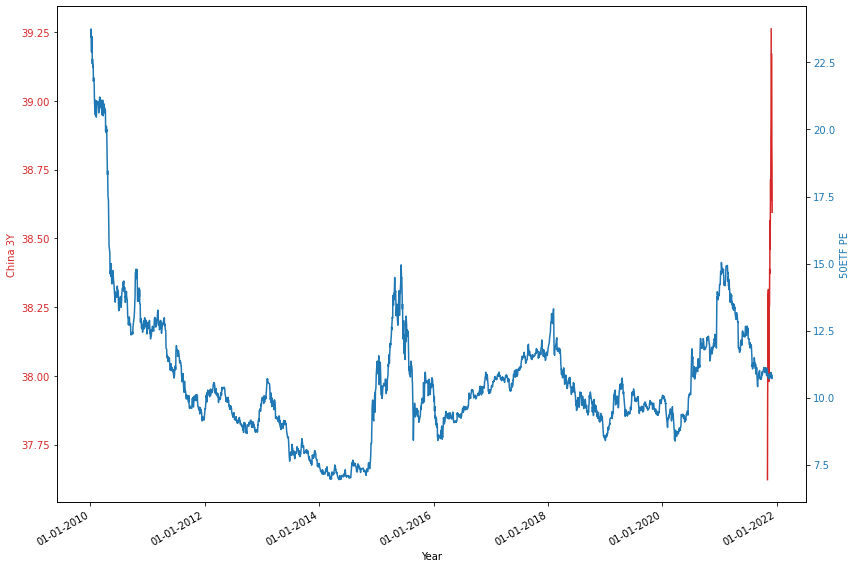

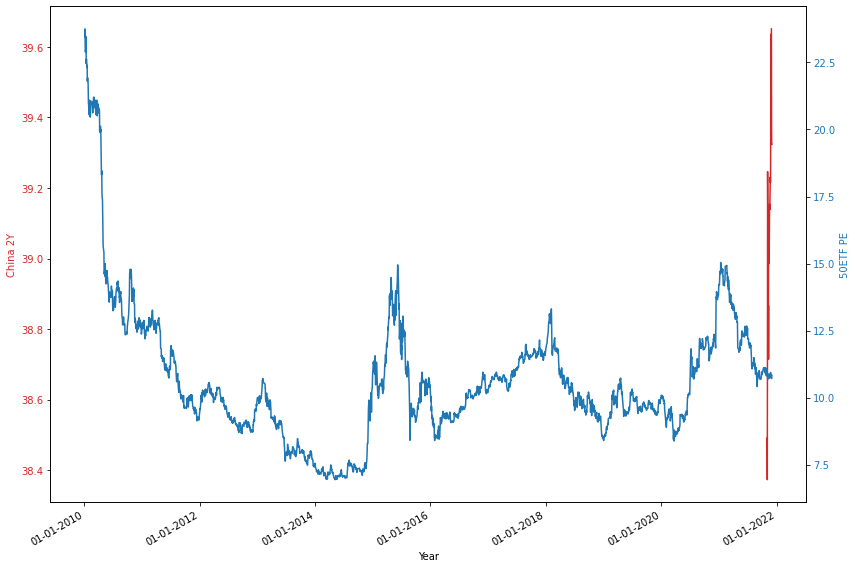

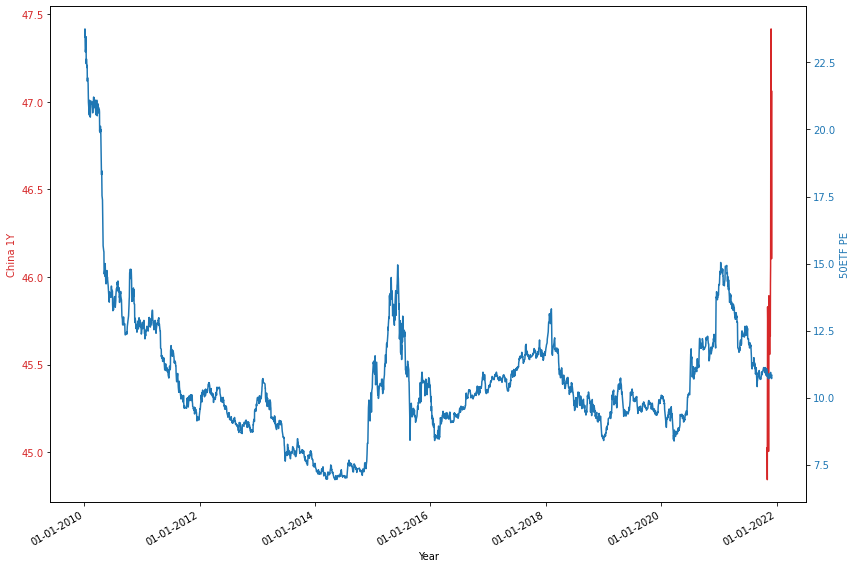

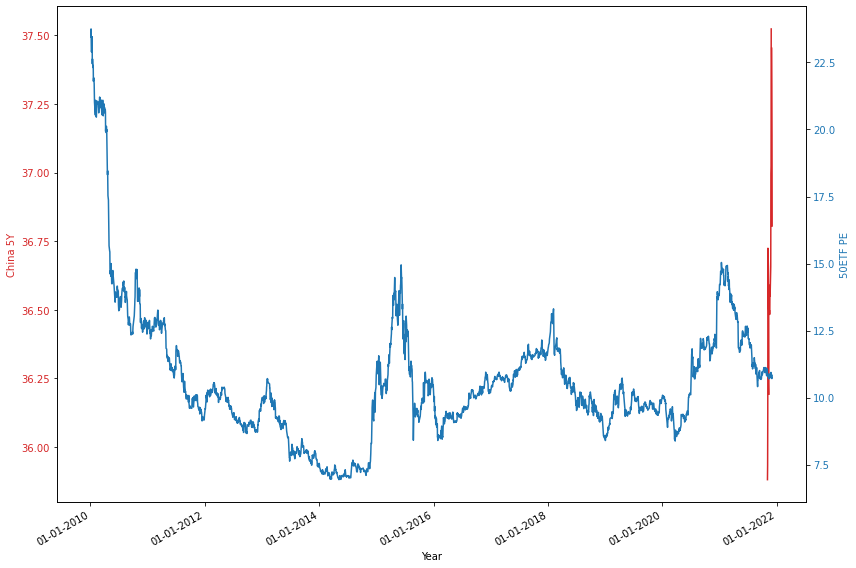

TypeError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f0de6c425f0> (for post_execute):


ValueError: ignored

ValueError: ignored

<Figure size 864x576 with 1 Axes>

In [ ]:
!pip install tushare
import pandas as pd
#dff= pd.read_csv('bond_yield.csv')
import tushare as ts
import pandas as pd
import numpy as np
import scipy.optimize as sco
import matplotlib.pyplot as plt
import seaborn as sns

ts.set_token('fa62e327bd3e882a69bbb0687045b3469984a9f5d25df49b6d850cbf')
pro = ts.pro_api()
dfs = pro.index_dailybasic(start_date='20100101', ts_code = '000016.SH',fields='trade_date,pe_ttm')
dfs.trade_date = pd.to_datetime(dfs.trade_date, format = "%Y%m%d")
import matplotlib.pyplot as plt
import matplotlib.collections as mcol
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
from matplotlib.lines import Line2D
import numpy as np
from matplotlib import dates as mpl_dates
xfmt = mpl_dates.DateFormatter('%d-%m-%Y')
#xfmt1 = mpl_dates.DateFormatter('%d-%m-%Y')
for code in df.columns[1:]:
    fig, ax1 = plt.subplots(figsize=(12,8))
    color = 'tab:red'
    ax1.set_xlabel('Year')
    ax1=plt.gca()
    ax1.xaxis.set_major_formatter(xfmt)
    plt.gcf().autofmt_xdate()
    ax1.set_ylabel(code, color=color)
    ax1.plot(df.index, 100.0/ df[code], color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2=plt.gca()
    ax2.xaxis.set_major_formatter(xfmt)
    plt.gcf().autofmt_xdate()
    ax2.set_ylabel('50ETF PE', color=color)  # we already handled the x-label with ax1
    ax2.plot(dfs['trade_date'],dfs['pe_ttm'], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()


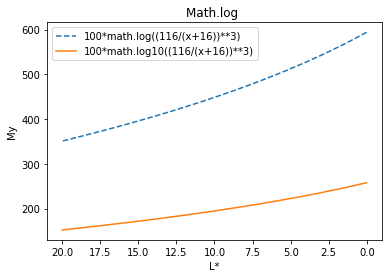

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
#sin & cos曲线
x = np.arange( 0.01,20,0.01)
#y1 = 100*math.log((116/(x+16))**3,5)
y2 = 100*np.log((116/(x+16))**3)
y3 = 100*np.log10((116/(x+16))**3)
#plt.plot(x,y1,label="100*math.log((116/(x+16))**3，5)")
plt.plot(x,y2,label="100*math.log((116/(x+16))**3)",linestyle = "--")
plt.plot(x,y3,label="100*math.log10((116/(x+16))**3)")
plt.xlabel("L*")
plt.ylabel("My")
plt.title('Math.log ')
plt.legend()   #打上标签
plt.gca().invert_xaxis()
plt.show()


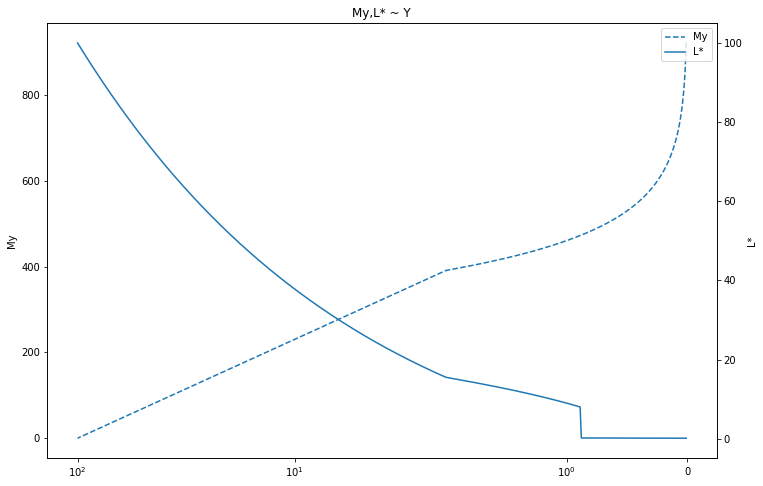

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
#sin & cos曲线
x = np.arange( 0.01,100,0.01)
#y1 = 100*math.log((116/(x+16))**3,5)
y2 = 100*np.log((100/(x)))
interval0 = [1 if (i/100 >=  (6/29)**3 ) else 0 for i in x]
interval1 = [1 if (i/100 <  (6/29)**3 ) else 0 for i in x]

y3 = (116*(x/100)**(1/3)-16) *interval0 + ((x/100)/(3*(6/29)**2)+4/29)*interval1
#plt.plot(x,y1,label="100*math.log((116/(x+16))**3，5)")
fig,ax = plt.subplots(figsize=(12,8))
ax1=ax.twinx()
line1,= ax.plot(x,y2,label="100*np.log((100/(x))) My )",linestyle = "--")
line2,= ax1.plot(x,y3,label="116*(x/100)**3-16 L*")

ax.set_ylabel("My")
ax1.set_ylabel("L*")
plt.title('My,L* ~ Y')
plt.legend((line1,line2),("My","L*")) 
plt.xscale('symlog')  #打上标签
plt.gca().invert_xaxis()
plt.show()


In [ ]:
Y = (6/29)**3*100
Y

0.8856451679035631

In [ ]:
y2 = 100*np.log((116/(0.1+16))**3)
print([100*math.log((116/(0.01+16))**3),100*math.log((116/(0.01+16))**3,4.4),100*math.log((116/(-10.01+16))**3,10)])
print([100*math.log((116/(1+16))**3),100*math.log((116/(1+16))**3,4.4),100*math.log((116/(1+16))**3,10)])

[594.1129992293223, 400.9929659494149, 386.1093500512821]
[576.1130541150446, 388.84401215162916, 250.20272035459334]


In [ ]:
a =0.01/100- (6/29)**3
a

-0.008756451679035632

In [ ]:
print([100*math.log(100/0.01),100*math.log(100/0.01,5),100*math.log(100/0.01,10)])

[921.0340371976183, 572.2706232293573, 400.0]


In [ ]:
def s(eq, var='x'):
    r = eval(eq.replace('=', '-(') + ')', {var:1j})
    return -r.real / r.imag
s('116*(x/100)**3=16')    

-137931.0344827586

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


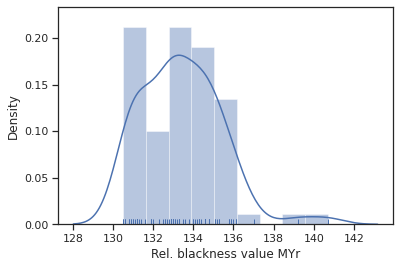

In [ ]:
import pandas as pd
data = pd.read_csv('/content/TOA CR FW 200 complaint 20210507 Low Jetness-Chart.csv',header = 0, usecols=[0,1,2,3,4,5])
data.head()
import seaborn as sns
from scipy import stats, integrate
sns.set_theme(style="ticks")


sns.distplot(data.iloc[:,3],rug=True)

# New Section

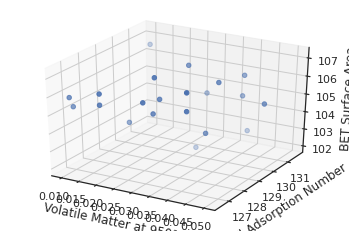

In [ ]:
data.dropna()
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
import pandas as pd
#定义坐标轴
fig = plt.figure()
ax1 = plt.axes(projection='3d')
ax1.scatter3D(data.iloc[:,1],data.iloc[:,2],data.iloc[:,3]) #绘制散点图
#ax1.plot3D(x,y,z,'gray') #绘制空间曲线
ax1.set_xlabel('Volatile Matter at 950℃')
ax1.set_ylabel('Oil Adsorption Number')
ax1.set_zlabel('BET Surface Area')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


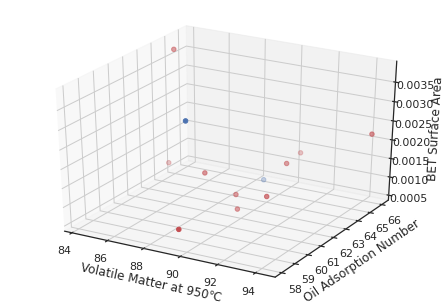

In [ ]:
import pylab as p
import mpl_toolkits.mplot3d.axes3d as p3

#data is an ndarray with the necessary data and colors is an ndarray with
#'b', 'g' and 'r' to paint each point according to its class

...

fig=p.figure()
ax = p3.Axes3D(fig)
ax.scatter(data.iloc[:10,1],data.iloc[:10,2],data.iloc[:10,3], c='r')
ax.scatter(data.iloc[11:,1],data.iloc[11:,2],data.iloc[11:,3], c='b')
ax.set_xlabel('Volatile Matter at 950℃')
ax.set_ylabel('Oil Adsorption Number')
ax.set_zlabel('BET Surface Area')
fig.add_axes(ax)
p.show()

In [ ]:
import pandas as pd
data = pd.read_csv('../content/3suan.csv',header = 0)
data.head()
import pylab as p
import mpl_toolkits.mplot3d.axes3d as p3

#data is an ndarray with the necessary data and colors is an ndarray with
#'b', 'g' and 'r' to paint each point according to its class

...

fig=p.figure()
ax = p3.Axes3D(fig)
ax.scatter(data.iloc[:11,0],data.iloc[:11,1],data.iloc[:11,2], c='r')
ax.scatter(data.iloc[12:,0],data.iloc[12:,1],data.iloc[12:,3], c='b')
ax.set_xlabel('STSA')
ax.set_ylabel('Volatile')
ax.set_zlabel('Pour Density')
fig.add_axes(ax)
p.show()

FileNotFoundError: ignored

In [ ]:
import pandas as pd
data = pd.read_csv('YOS N600 OS.csv',header = 0)
data.head()
import pylab as p
import mpl_toolkits.mplot3d.axes3d as p3


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Row Labels                  21 non-null     int64  
 1   Ash Content                 21 non-null     float64
 2   Nitrogen Surface Area, BET  21 non-null     float64
 3   Oil Absorption Number       21 non-null     float64
 4   pH                          21 non-null     float64
 5   Sieve residue (325M %)      21 non-null     float64
 6   Tint Strength, IRB=100%     21 non-null     float64
 7   Volatile                    21 non-null     float64
 8   Myr                         21 non-null     float64
 9   dM                          21 non-null     float64
 10  Gyr                         21 non-null     float64
 11  dG                          21 non-null     float64
dtypes: float64(11), int64(1)
memory usage: 2.1 KB


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: ignored

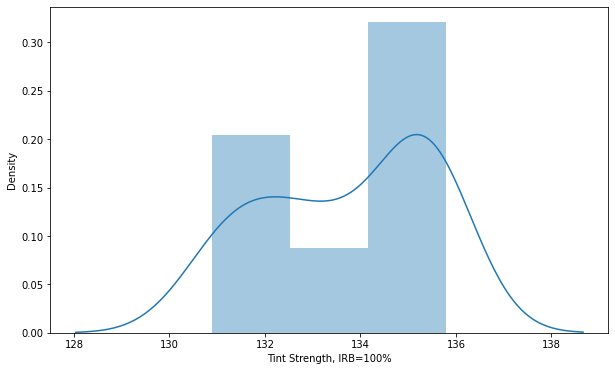

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,6))
sns.distplot(data.iloc[:,6])
sns.distplot(df.iloc[:,8])
fig.legend(labels=['YOS NEROX 600 LS3+AT2',"BUP NEROX 600 LS+AT2"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


NameError: ignored

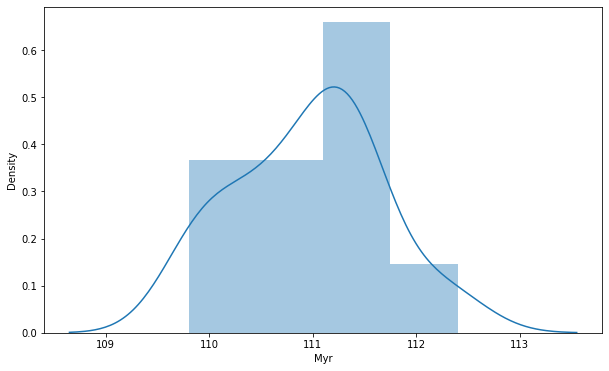

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.distplot(data.iloc[:,8])
sns.distplot(df.iloc[:,17])
fig.legend(labels=['YOS NEROX 600 LS3+AT2',"BUP NEROX 600 LS+AT2"])


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


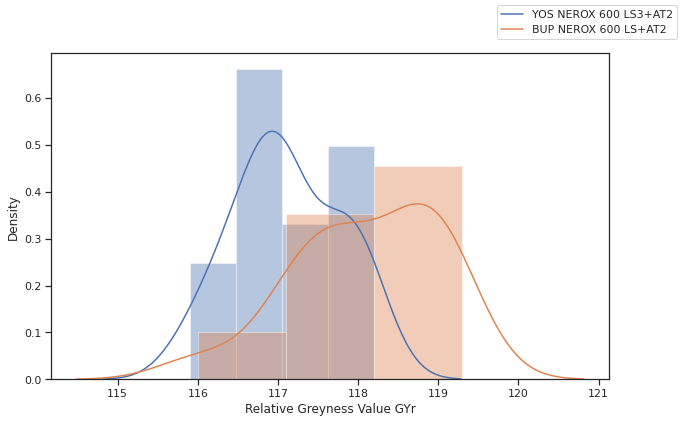

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.distplot(data.iloc[:,10])
sns.distplot(df.iloc[:,19])
fig.legend(labels=['YOS NEROX 600 LS3+AT2',"BUP NEROX 600 LS+AT2"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


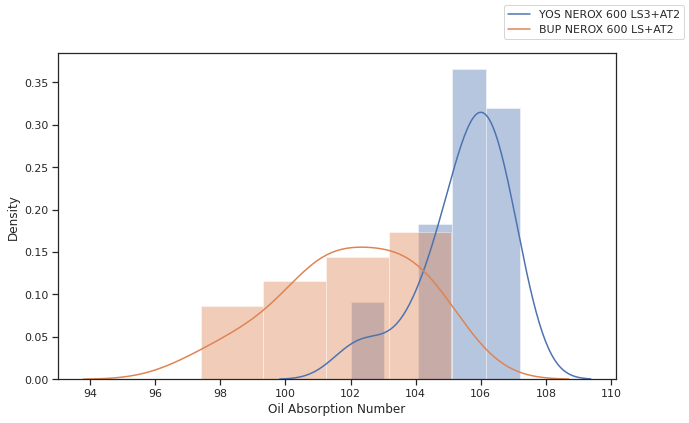

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.distplot(data.iloc[:,3])
sns.distplot(df.iloc[:,7])
fig.legend(labels=['YOS NEROX 600 LS3+AT2',"BUP NEROX 600 LS+AT2"])

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


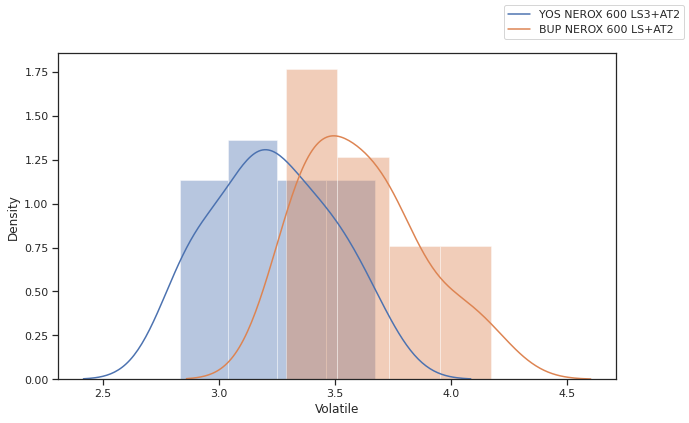

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.distplot(data.iloc[:,7])
sns.distplot(df.iloc[:,13])
fig.legend(labels=['YOS NEROX 600 LS3+AT2',"BUP NEROX 600 LS+AT2"])

In [2]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 5.4 MB/s 


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


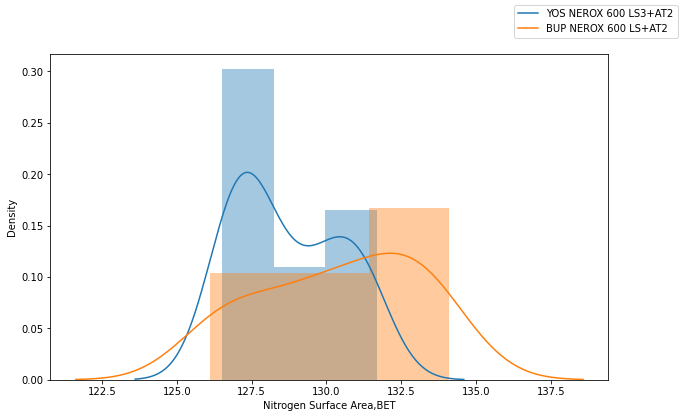

In [ ]:
fig = plt.figure(figsize=(10,6))
sns.distplot(data.iloc[:,2])
sns.distplot(df.iloc[:,5])
fig.legend(labels=['YOS NEROX 600 LS3+AT2',"BUP NEROX 600 LS+AT2"])

Text(0.5, 1.0, 'YOS NEROX 600 LS3+AT2')

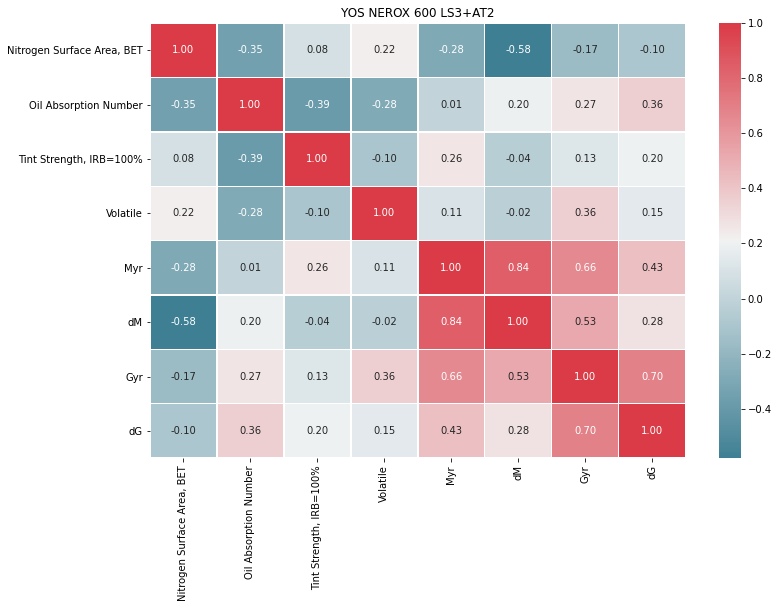

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
xcorr = data.iloc[:,1:12].drop(['Ash Content','Sieve residue (325M %)','pH'],axis=1).corr()
#c = sns.pairplot(data.iloc[:,1:12].drop(['Ash Content','Sieve residue (325M %)','pH'],axis=1),diag_kind='kde',kind='kde')


#g = sns.PairGrid(data)
#g.map_diag(sns.kdeplot)
#mask为 和相关系数矩阵xcorr一样大的 全0(False)矩阵
#mask = np.zeros_like(xcorr, dtype=np.bool)
# 将mask右上三角(列号》=行号)设置为True
#mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(12,8)) 
cmap = sns.diverging_palette(220, 10, as_cmap=True) 
sns.heatmap(xcorr, cmap=cmap,annot=True, fmt='0.2f',linewidths=.5, ax=ax)

#c.map_lower(sns.kdeplot, cmap='Blues_d')
ax.set_title('YOS NEROX 600 LS3+AT2')
#plt.legend(['YOS NEROX 600 LS3+AT2'])
#plt.show()

In [ ]:
featureArray = data.iloc[:,1:12].drop(['Tint Strength, IRB=100%', 'Myr', 'dM', 'Gyr', 'dG'],axis = 1).columns
featureArray

Index(['Ash Content', 'Nitrogen Surface Area, BET', 'Oil Absorption Number',
       'pH', 'Sieve residue (325M %)', 'Volatile'],
      dtype='object')

[09:01:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


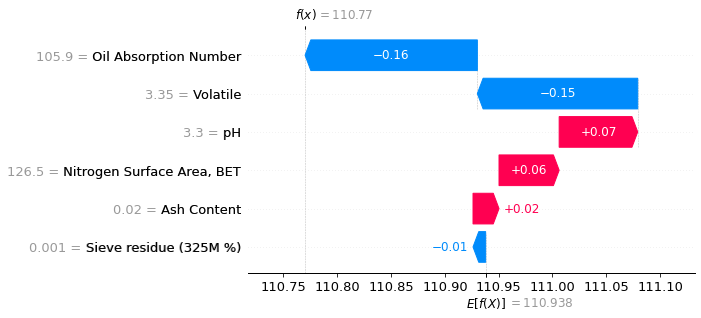

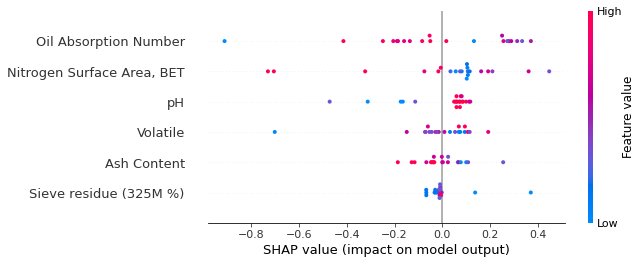

In [ ]:
import xgboost
import shap
x = data.iloc[:,1:12][featureArray]
x
y = data.iloc[:,1:12]['Myr']
y
model = xgboost.XGBRegressor().fit(x, y)
explainer = shap.Explainer(model)
shap_values = explainer(x)
shap.plots.waterfall(shap_values[0])
shap.plots.beeswarm(shap_values)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0    NX600 - Batch No.                 18 non-null     int64  
 1    BT40 - Batch No.                  18 non-null     int64  
 2    BT ex BUP or YOS                  18 non-null     object 
 3    Process Date                      18 non-null     object 
 4   Iodine Adsorption Number(Non dry)  18 non-null     float64
 5   Nitrogen Surface Area,BET          18 non-null     float64
 6   STSA                               18 non-null     float64
 7   Oil Absorption Number              18 non-null     float64
 8   Tint Strength, IRB=100%            18 non-null     float64
 9   Sieve residue (325M %)             18 non-null     float64
 10  Pour Density (kg/m3)               17 non-null     float64
 11  pH                                 18 non-null     float64
 

Text(0.5, 1.0, 'My vs. Colloidal')

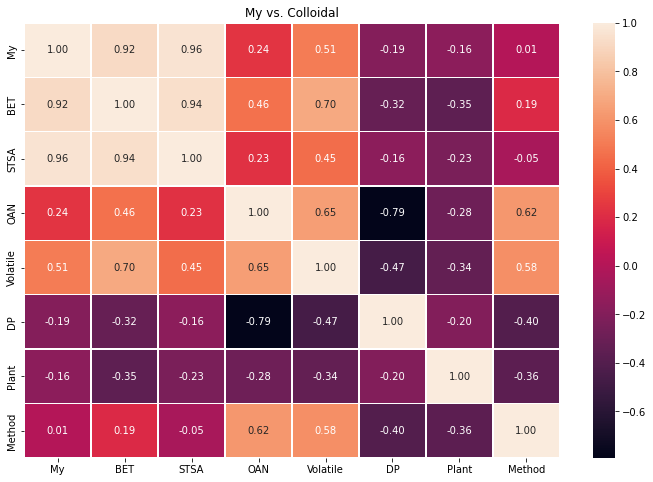

In [20]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('colloidal 930.csv',header = 0,encoding = 'unicode_escape')
df.head()
df['n-s']= df['BET'] - df['STSA']
#df.columns
import matplotlib.pyplot as plt
xcorr = df.iloc[:,2:10].corr()

fig, ax = plt.subplots(figsize=(12,8))         # Sample figsize in inches
#sns.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)
sns.heatmap(xcorr, annot=True, fmt='0.2f',linewidths=.5, ax=ax)
#c = sns.pairplot(df.iloc[:,4:23],diag_kind='kde',kind='kde')


#g = sns.PairGrid(data)
#g.map_diag(sns.kdeplot) 
#c.map_upper(plt.scatter, color = 'r')

#c.map_lower(sns.kdeplot, cmap='Blues_d')
ax.set_title('My vs. Colloidal')

[14:29:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


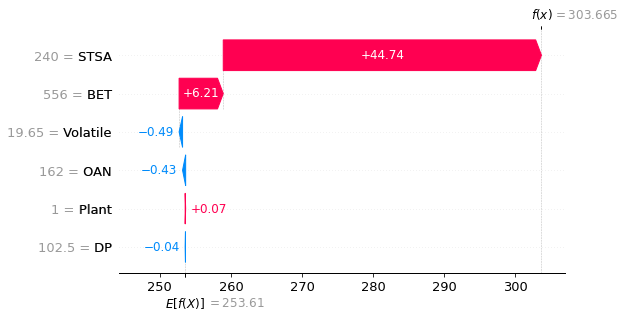

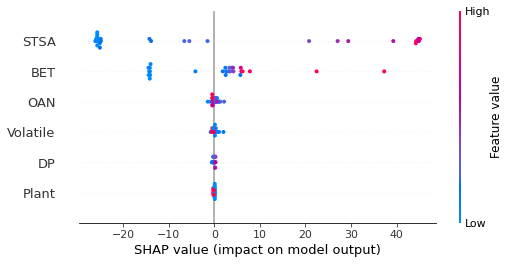

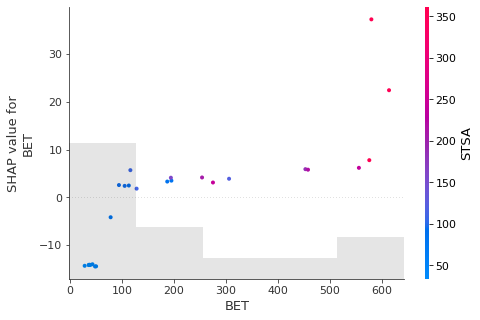

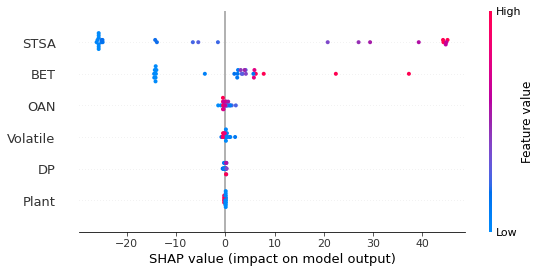

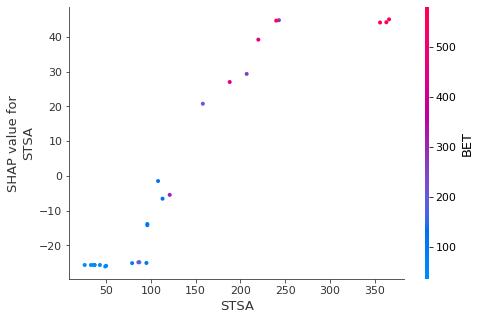

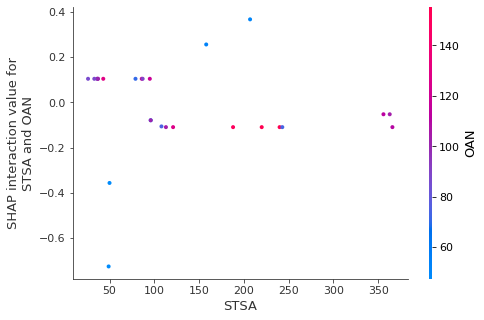

In [15]:
featureArray = df.iloc[:,3:9].columns
featureArray
import xgboost
import shap
import numpy as np
x = df.iloc[0:26,3:9][featureArray]
x
y = df.iloc[0:26,2]
y
model = xgboost.XGBRegressor().fit(x, y)
explainer = shap.Explainer(model)
shap_values = explainer(x)
shap_interaction_values = explainer.shap_interaction_values(x)
shap.plots.waterfall(shap_values[3])
#shap.summary_plot(shap_values, x)
shap.plots.beeswarm(shap_values)
shap.plots.scatter(shap_values[:,"BET"], color=shap_values)
shap_values = shap.TreeExplainer(model).shap_values(x)
shap.summary_plot(shap_values, x)
shap.dependence_plot("STSA", shap_values, x)
shap.dependence_plot(
    ("STSA", "OAN"),
    shap_interaction_values, x.iloc[:26,:])

In [19]:
df.describe()

,L,My,BET,STSA,OAN,Volatile,DP,Plant,Method,ÁÐ2,...,ÁÐ16367,ÁÐ16368,ÁÐ16369,ÁÐ16370,ÁÐ16371,ÁÐ16372,ÁÐ16373,ÁÐ16374,ÁÐ16375,n-s
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.000000
mean,4.172222,252.000000,208.407407,131.518519,98.518519,5.401778,207.351852,1.296296,1.296296,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76.888889
std,2.807463,40.127681,198.381579,106.383692,32.825143,6.538161,80.195172,0.465322,0.541708,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.937466
min,0.450000,208.000000,28.000000,18.000000,45.000000,0.340000,102.500000,1.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.000000
25%,1.300000,214.000000,45.500000,46.000000,74.500000,0.899000,159.000000,1.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000
50%,3.900000,241.000000,116.000000,96.000000,102.000000,1.330000,184.000000,1.000000,1.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000
75%,7.260000,287.000000,290.500000,197.500000,118.000000,12.400000,233.500000,2.000000,1.500000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,147.000000
max,8.120000,337.000000,614.000000,366.000000,162.000000,19.650000,422.000000,2.000000,3.000000,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,316.000000


In [ ]:
import shap
import xgboost
from sklearn.model_selection import train_test_split
import matplotlib.pylab as pl
xgb_full = xgboost.DMatrix(x, label=y)

# create a train/test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=7)
xgb_train = xgboost.DMatrix(X_train, label=y_train)
xgb_test = xgboost.DMatrix(X_test, label=y_test)

In [ ]:
# use validation set to choose # of trees
params = {
    "eta": 0.002,
    "max_depth": 3,
    "objective": "survival:cox",
    "subsample": 0.5
}
model_train = xgboost.train(params, xgb_train, 10000, evals = [(xgb_test, "test")], verbose_eval=1000)
# train final model on the full data set
params = {
    "eta": 0.002,
    "max_depth": 3, 
    "objective": "survival:cox",
    "subsample": 0.5
}
model = xgboost.train(params, xgb_full, 5000, evals = [(xgb_full, "test")], verbose_eval=1000)

[0]	test-cox-nloglik:0.346574
[1000]	test-cox-nloglik:0.156871
[2000]	test-cox-nloglik:0.087767
[3000]	test-cox-nloglik:0.056348
[4000]	test-cox-nloglik:0.042205
[5000]	test-cox-nloglik:0.029403
[6000]	test-cox-nloglik:0.022395
[7000]	test-cox-nloglik:0.016959
[8000]	test-cox-nloglik:0.012403
[9000]	test-cox-nloglik:0.01
[9999]	test-cox-nloglik:0.008364
[0]	test-cox-nloglik:2.09097
[1000]	test-cox-nloglik:1.73875
[2000]	test-cox-nloglik:1.56123
[3000]	test-cox-nloglik:1.43504
[4000]	test-cox-nloglik:1.34198
[4999]	test-cox-nloglik:1.2729


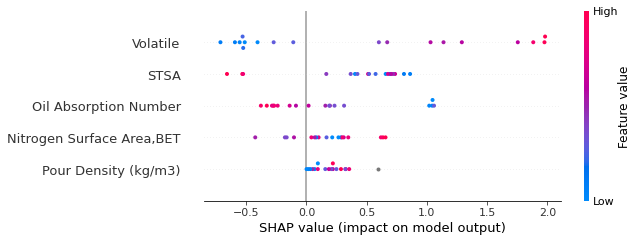

In [ ]:
shap_values = shap.TreeExplainer(model).shap_values(x)
shap.summary_plot(shap_values, x)

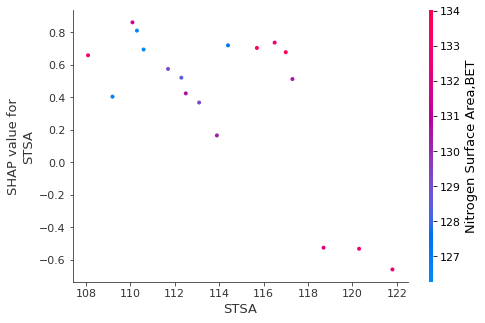

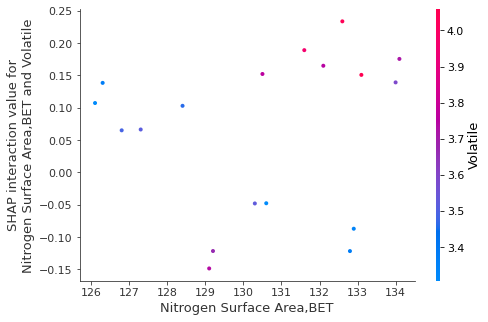

In [ ]:
shap.dependence_plot("STSA", shap_values, x)
shap.dependence_plot(
    ("Nitrogen Surface Area,BET", "Volatile"),
    shap_interaction_values, x.iloc[:20,:])

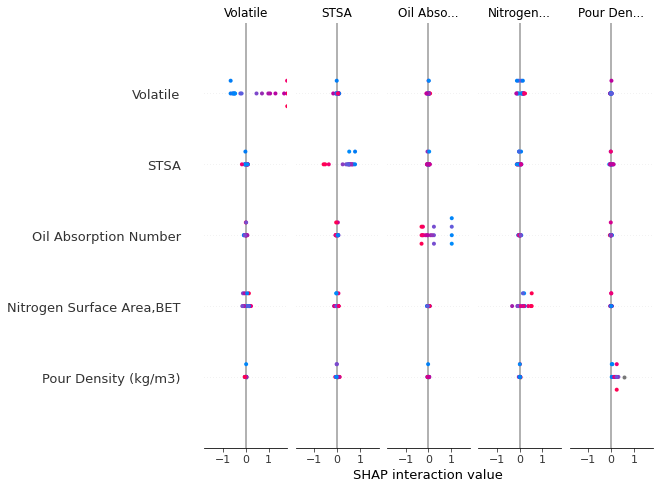

In [ ]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(x.iloc[:20,:])
shap.summary_plot(shap_interaction_values, x.iloc[:20,:])

**`bold text`**# New Section

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
%cd '/content/drive/My Drive' 
#!pwd 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive


In [ ]:
!mkdir researchHub
# %cd './researchHub'
os.chdir('./researchHub')
dir
!git clone https://github.com/david2588e/GraviPy/docs/


Cloning into 'docs'...
remote: Not Found
fatal: repository 'https://github.com/david2588e/GraviPy/docs/' not found


# New Section

In [ ]:
s 

# New Section

In [ ]:
import numpy as np
import pandas as pd
import scipy as sp
a = np.matrix([[0,0,0],[0,0,1],[0,-1,0]])
b = np.matrix([[0,0,-1],[0,0,0],[1,0,0]])

In [ ]:
c = np.matmul(a,b) - np.matmul(b,a)
cc = np.matmul(a,b)

In [ ]:
c


matrix([[ 0, -1,  0],
        [ 1,  0,  0],
        [ 0,  0,  0]])

In [ ]:

cc = np.matmul(np.transpose(a),b)
cc
cd = np.matmul(a,b)
cd

matrix([[0, 0, 0],
        [1, 0, 0],
        [0, 0, 0]])

!pip install investpy

In [ ]:
!pip install investpy

     |████████████████████████████████| 4.4 MB 29.8 MB/s 
     |████████████████████████████████| 235 kB 54.6 MB/s 
     |████████████████████████████████| 6.4 MB 39.7 MB/s 
  Created wheel for investpy: filename=investpy-1.0.8-py3-none-any.whl size=4481592 sha256=d2e4b4aea83de200c0e0ddf121f216ef0bb4c2bb8d4b222fc66808d522d9236d
  Stored in directory: /root/.cache/pip/wheels/96/a8/a5/0d33c72eaf00b41df7b9dc1e15d2b7c7154b3f1379ed350211
Successfully built investpy
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import investpy
df = investpy.get_stock_historical_data(stock='AAPL',country='United States',from_date='01/01/2010',to_date='21/04/2022')
print(df.tail())

              Open    High     Low   Close    Volume Currency
Date                                                         
2022-04-13  167.39  171.04  166.77  170.40  70185000      USD
2022-04-14  170.62  171.27  165.04  165.29  75329000      USD
2022-04-18  163.92  166.60  163.57  165.07  67372000      USD
2022-04-19  165.02  167.82  163.91  167.40  67423000      USD
2022-04-20  168.76  168.88  166.10  167.23  67718000      USD
